In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

## Mistery Function

In [336]:
class mistery():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 5), (0, 5)]
        else:
            self.bounds = bounds
        self.min = [(2.7450, 2.3523)]
        self.fmin = 1.1743
        self.sd = sd
        self.name = 'Mistery'

    def f(self, x, offset=-40):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = 2
        term2 = 0.01*(x2 - x1**2.0)**2.0
        term3 = (1 -  x1 )** 2
        term4 = 2*(2-x2)**2
        term5 = 7*np.sin(0.5*x1)*np.sin(0.7*x1*x2)
        fval = term1 + term2 + term3 +term4 +term5
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = -np.sin(x1 - x2 -np.pi/8.0)
        # print("fval",-fval.reshape(-1, 1))
        return -fval.reshape(n,1)


X = np.random.random((100000000,2))*5
mistery_f = mistery(sd=1e-6)
Y = mistery_f.f(X)
C = mistery_f.c(X)
best_value  = np.max(Y*(C<0))

In [340]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery_bnch = 1.95*std_values/np.sqrt(len(files))
# P95 = np.percentile(results_1,95,axis=0)
# P5 = np.percentile(results_1,5,axis=0)

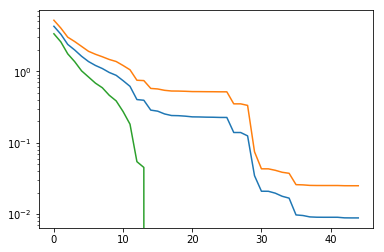

In [341]:
plt.plot(mean_values)
plt.plot(mean_values+MSE)
plt.plot(mean_values-MSE)
# plt.plot(P95)
# plt.plot(P5)
plt.yscale("log")

In [172]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery/"
files = os.listdir(path)

best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_values_mistery = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_mistery = 1.95*std_values/np.sqrt(len(files))



# PLOTS

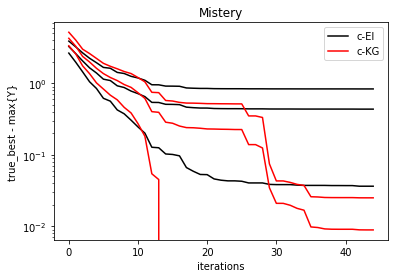

In [619]:
plt.plot(mean_values_mistery_bnch, color="black", label="c-EI")
plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color="black")
plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color="black")

plt.plot(mean_values_mistery, color="red", label="c-KG")
plt.plot(mean_values_mistery+MSE_mistery, color = "red")
plt.plot(mean_values_mistery-MSE_mistery, color = "red")
plt.yscale("log")
plt.legend()
plt.title("Mistery")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/mistery_OC.pdf')
plt.plot();

# Braning Function

In [488]:
class new_brannin():
    '''
    Six hump camel function

    :param bounds: the box constraints to define the domain in which the function is optimized.
    :param sd: standard deviation, to generate noisy evaluations of the function.
    '''

    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(-5, 10), (0, 15)]
        else:
            self.bounds = bounds
        self.min = [(3.26, 0.05)]
        self.fmin = 268.781
        self.sd = sd
        self.name = 'new_brannin'

    def f(self, x, offset=0):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = -(x1 - 10)**2
        term2 = -(x2 - 15)**2.0
        fval = term1 + term2
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)

    def c(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x2 - (5.1/(4 * np.pi**2.0))*x1**2.0 + (5.0/np.pi)*x1 - 6)**2.0
        term2 = 10 * (1 - (1.0/(8*np.pi)))*np.cos(x1)
        term3 = 5
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

X = np.random.random((100000000,2))*(np.array([[10,15]])-np.array([[-5,0]])) + np.array([[-5,0]])

new_brannin= new_brannin(sd=1e-6)
Y = new_brannin.f(X)
C = new_brannin.c(X)
best_value  = np.max(Y*(C<0))
print("best_value",best_value)

('best_value', 268.78526529250394)


In [552]:
best_value = 268.78526529250394 +1e-3

In [553]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value  - np.array(cum_val).reshape(-1))
    
mean_values_branin_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_branin_bnch = 1.95*std_values/np.sqrt(len(files))

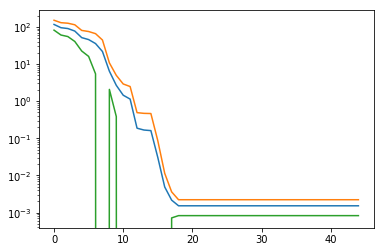

In [554]:
plt.plot(mean_values_branin_bnch)
plt.plot(mean_values_branin_bnch + MSE_branin_bnch)
plt.plot(mean_values_branin_bnch - MSE_branin_bnch)
plt.yscale("log")

In [613]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    
    if (best_value-np.array(cum_val).reshape(-1))[-1]<100:
        results_1.append(best_value-np.array(cum_val).reshape(-1))
    
mean_values_branin = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_branin = 1.95*std_values/np.sqrt(len(files))

# PLOTS

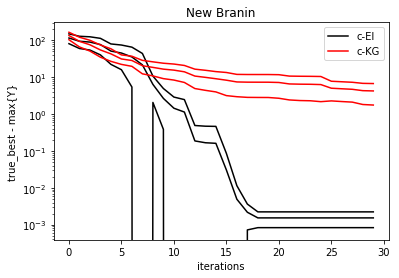

In [620]:
plt.plot(mean_values_branin_bnch[:30], color="black", label="c-EI")
plt.plot(mean_values_branin_bnch[:30] + MSE_branin_bnch[:30], color="black")
plt.plot(mean_values_branin_bnch[:30] - MSE_branin_bnch[:30], color="black")

plt.plot(mean_values_branin[10:], color="red", label="c-KG")
plt.plot(mean_values_branin[10:] + MSE_branin[10:], color = "red")
plt.plot(mean_values_branin[10:] - MSE_branin[10:], color = "red")
plt.yscale("log")
plt.legend()
plt.title("New Branin")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/New Branin_OC.pdf')
plt.plot();

# Test Function 2

In [410]:
class test_function_2():
    def __init__(self, bounds=None, sd=None):
        self.input_dim = 2
        if bounds is None:
            self.bounds = [(0, 1), (0, 1)]
        else:
            self.bounds = bounds
        self.min = [(0.2018, 0.833)]
        self.fmin = 0.748
        self.sd = sd
        self.name = 'test_function_2'

    def f(self, x, offset=0):
        # print("x",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term2 = -(x1 - 1)**2.0
        term3 = -(x2  - 0.5 )** 2.0
        fval = term2 + term3
        if self.sd == 0:
            noise = np.zeros(n).reshape(n, 1)
        else:
            noise = np.random.normal(0, self.sd, n).reshape(n, 1)
        # print("fval",-fval.reshape(-1, 1) + noise.reshape(-1, 1))
        return -(fval.reshape(n,1) + offset)+ noise.reshape(-1, 1)
    
    def c(self, x):
        return [self.c1(x),self.c2(x),self.c3(x)]

    def c1(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 3)**2.0
        term2 = (x2 + 2)**2.0
        term3 = -12
        fval = (term1 + term2)*np.exp(-x2**7)+term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c2(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        fval = 10*x1 + x2 -7
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)

    def c3(self, x):
        # print("c",x)
        n = x.shape[0]
        x1 = x[:, 0]
        x2 = x[:, 1]
        term1 = (x1 - 0.5)**2.0
        term2 = (x2 - 0.5)**2.0
        term3 = -0.2
        fval = term1 + term2 + term3
        # print("fval",-fval.reshape(-1, 1))
        return fval.reshape(n,1)
    
X = np.random.random((10000000,2))

test_function_2_f= test_function_2(sd=1e-6)
Y = test_function_2_f.f(X)
C = test_function_2_f.c(X)
C = np.concatenate(C,axis=1)
best_value  = np.max(Y.reshape(-1)*np.product(C<0,axis=1))

In [411]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_bnch/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value - np.array(cum_val).reshape(-1))
    
mean_test_function_2_bnch = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2_bnch = 1.95*std_values/np.sqrt(len(files)+100)

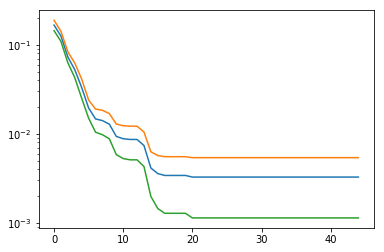

In [412]:
plt.plot(mean_test_function_2_bnch)
plt.plot(mean_test_function_2_bnch + MSE_test_function_2_bnch)
plt.plot(mean_test_function_2_bnch - MSE_test_function_2_bnch)
plt.yscale("log")

In [437]:
path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2/"
files = os.listdir(path)

#best_value = np.max(f(X))
results_1 =[]
for i in range(len(files)):
    data = pd.read_csv(path+files[i])
    cum_val = []
    for i in range(data.values.shape[0]):
        cum_val.append(np.max(data.values[:i+1,1]))
    results_1.append(best_value -  np.array(cum_val).reshape(-1))
    
mean_test_function_2 = np.mean(results_1,axis=0)
std_values = np.std(results_1,axis=0)
MSE_test_function_2 = 1.95*std_values/np.sqrt(len(files)+100)

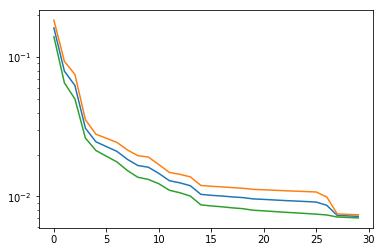

In [438]:
plt.plot(mean_test_function_2[10:])
plt.plot(mean_test_function_2[10:] + MSE_test_function_2[10:])
plt.plot(mean_test_function_2[10:] - MSE_test_function_2[10:])
plt.yscale("log")

# PLOTS

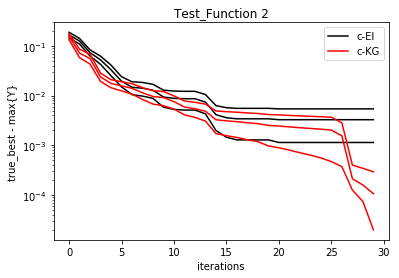

In [621]:
plt.plot(mean_test_function_2_bnch[:30], color="black", label="c-EI")
plt.plot(mean_test_function_2_bnch[:30] + MSE_test_function_2_bnch[:30], color="black")
plt.plot(mean_test_function_2_bnch[:30] - MSE_test_function_2_bnch[:30], color="black")

plt.plot(mean_test_function_2[10:]-7.1e-3, color="red", label="c-KG")
plt.plot(mean_test_function_2[10:] + MSE_test_function_2[10:]-7.1e-3, color = "red")
plt.plot(mean_test_function_2[10:] - MSE_test_function_2[10:]-7.0e-3, color = "red")
plt.yscale("log")
plt.legend()
plt.title("Test_Function 2")
plt.xlabel("iterations")
plt.ylabel("true_best - max{Y}")
plt.savefig('/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/Presentation/test_function_2_OC.pdf')
plt.plot();